In [96]:
import talib as ta 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt 
import yfinance as yf

In [97]:
ticker = yf.Ticker('GOOGL')
start_date = dt.datetime.now() - dt.timedelta(days=365*2) # 2YTD
data = ticker.history(start=start_date)

In [98]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00-05:00,137.381994,138.116450,135.327525,135.367218,27137700,0.0,0.0
2024-01-05 00:00:00-05:00,135.724498,136.131427,134.136491,134.712143,22513900,0.0,0.0
2024-01-08 00:00:00-05:00,135.267963,137.967567,135.238189,137.798843,21404000,0.0,0.0
2024-01-09 00:00:00-05:00,137.461381,140.428964,137.114000,139.893005,24759600,0.0,0.0
2024-01-10 00:00:00-05:00,139.942643,141.927645,139.853322,141.213043,21320200,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-26 00:00:00-05:00,314.480011,315.089996,312.279999,313.510010,10899000,0.0,0.0
2025-12-29 00:00:00-05:00,311.369995,314.019989,310.619995,313.559998,19621800,0.0,0.0
2025-12-30 00:00:00-05:00,312.500000,316.950012,312.459991,313.850006,17380900,0.0,0.0


# Moving Averages

## Simple Moving Average (SMA)

SMA is the average of closing prices over a specified period.

**Formula:**
$$\text{SMA}_n = \frac{1}{n} \sum_{i=1}^{n} P_i$$

Where:
- $P_i$ are the closing prices
- $n$ is the number of periods (timeperiod)

**How it works:**
- Day 100: Average of days 1-100
- Day 101: Average of days 2-101
- Day 102: Average of days 3-102
- And so on...

It "smooths out" price fluctuations to show the trend. The first 100 values are `NaN` because we need 100 data points before calculating the first average.

In [99]:
data['SMA100'] = ta.SMA(data['Close'], timeperiod=100)

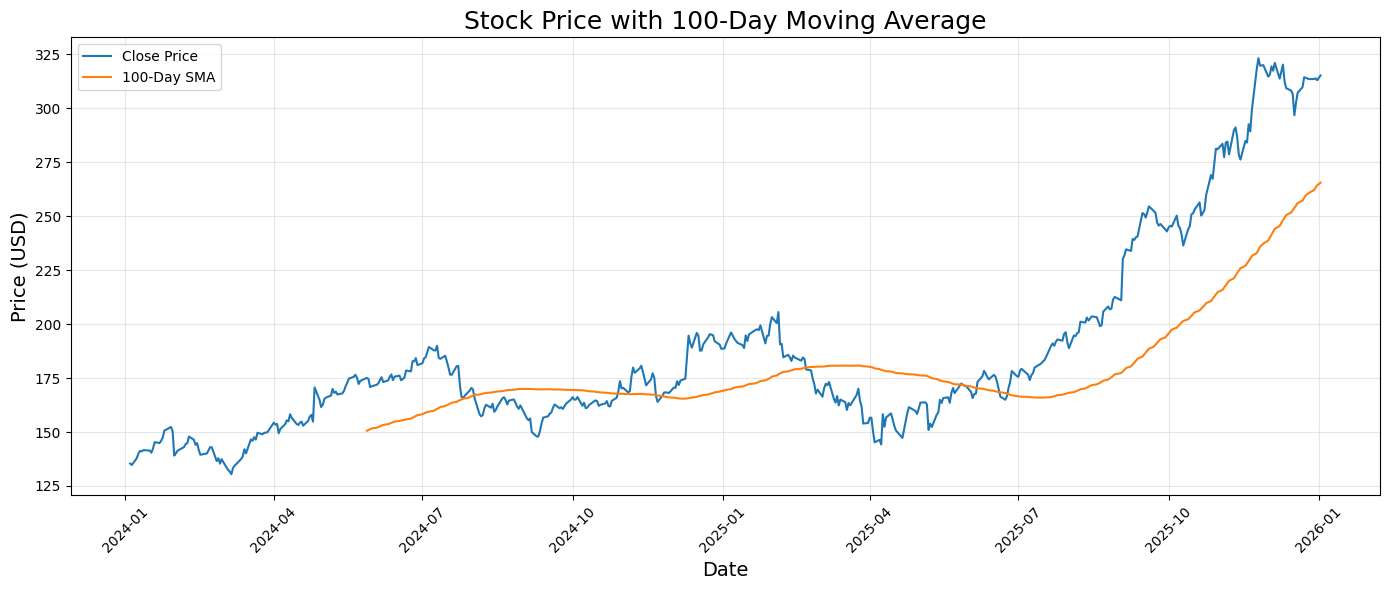

In [100]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

## Exponential Moving Average (EMA)

EMA is similar to SMA but gives more weight to recent prices. It responds faster to price changes than a simple moving average.

**Formula:**
$$\text{EMA}_t = P_t \cdot \alpha + \text{EMA}_{t-1} \cdot (1 - \alpha)$$

Where:
- $P_t$ is the current price
- $\alpha = \frac{2}{n+1}$ is the smoothing factor
- $n$ is the number of periods (timeperiod)

**Key differences from SMA:**
- **Responsive**: Reacts faster to recent price changes because recent prices have higher weight
- **Recursive**: Each EMA value depends on the previous EMA value
- **No NaN values at start**: Can be calculated from the first value using the first price as the starting EMA

**When to use:**
- SMA: Good for identifying long-term trends
- EMA: Better for short-term trading and catching trend changes quickly

In [101]:
data['EMA100'] = ta.EMA(data['Close'], timeperiod=100)

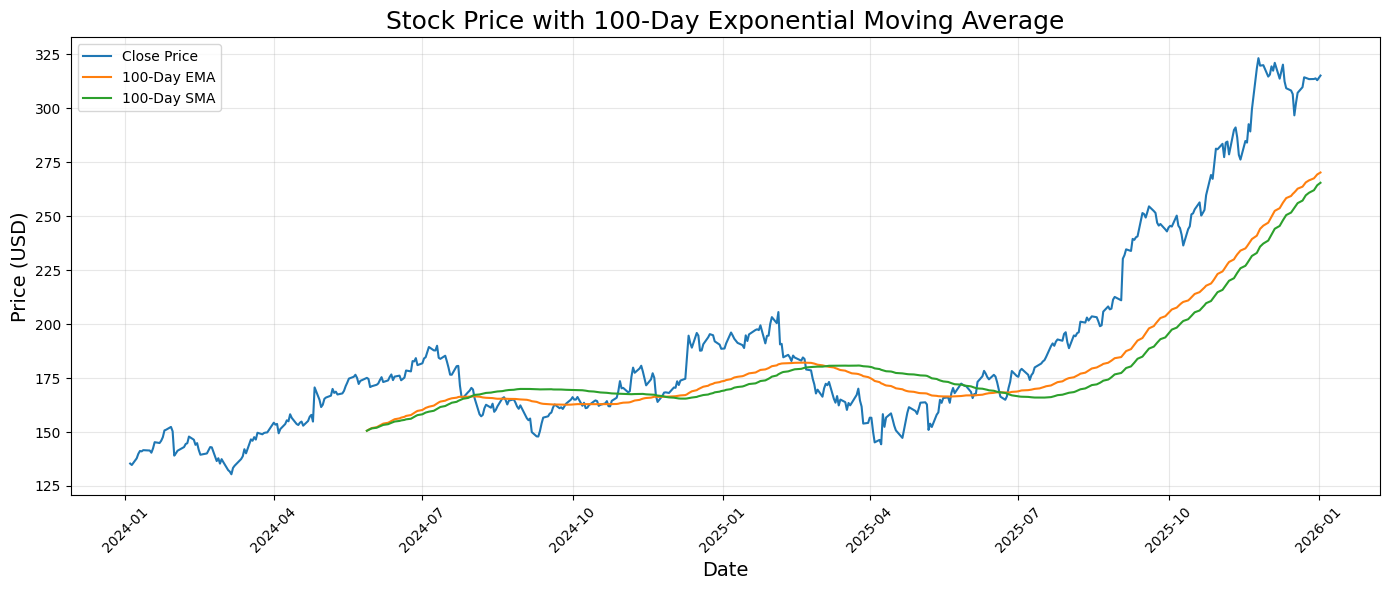

In [102]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['EMA100'], label='100-Day EMA', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)

plt.title('Stock Price with 100-Day Exponential Moving Average', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

## Relative Strength Index (RSI)

RSI is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions.

**Formula:**
$$\text{RSI} = 100 - \frac{100}{1 + RS}$$

Where:
$$RS = \frac{\text{Average Gain}}{\text{Average Loss}}$$

**Average Gain and Loss Calculation:**

For the first period (typically 14 days):
$$\text{Average Gain} = \frac{\sum_{i=1}^{n} \text{Gain}_i}{n}$$
$$\text{Average Loss} = \frac{\sum_{i=1}^{n} |\text{Loss}_i|}{n}$$

Where $\text{Gain}_i = \max(P_i - P_{i-1}, 0)$ and $\text{Loss}_i = \max(P_{i-1} - P_i, 0)$

For subsequent periods, exponential smoothing is used:
$$\text{Average Gain}_{\text{new}} = \frac{\text{Average Gain}_{\text{old}} \times (n-1) + \text{Current Gain}}{n}$$
$$\text{Average Loss}_{\text{new}} = \frac{\text{Average Loss}_{\text{old}} \times (n-1) + \text{Current Loss}}{n}$$

**Interpretation:**
- **RSI > 70**: Overbought condition (price may be overvalued, potential sell signal)
- **RSI < 30**: Oversold condition (price may be undervalued, potential buy signal)
- **30-70**: Neutral zone (no overbought/oversold signal)

**Key characteristics:**
- Oscillates between 0 and 100
- More useful in ranging markets than trending markets
- Can signal momentum shifts before price reverses
- Complements moving averages by showing strength of the trend

In [103]:
data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

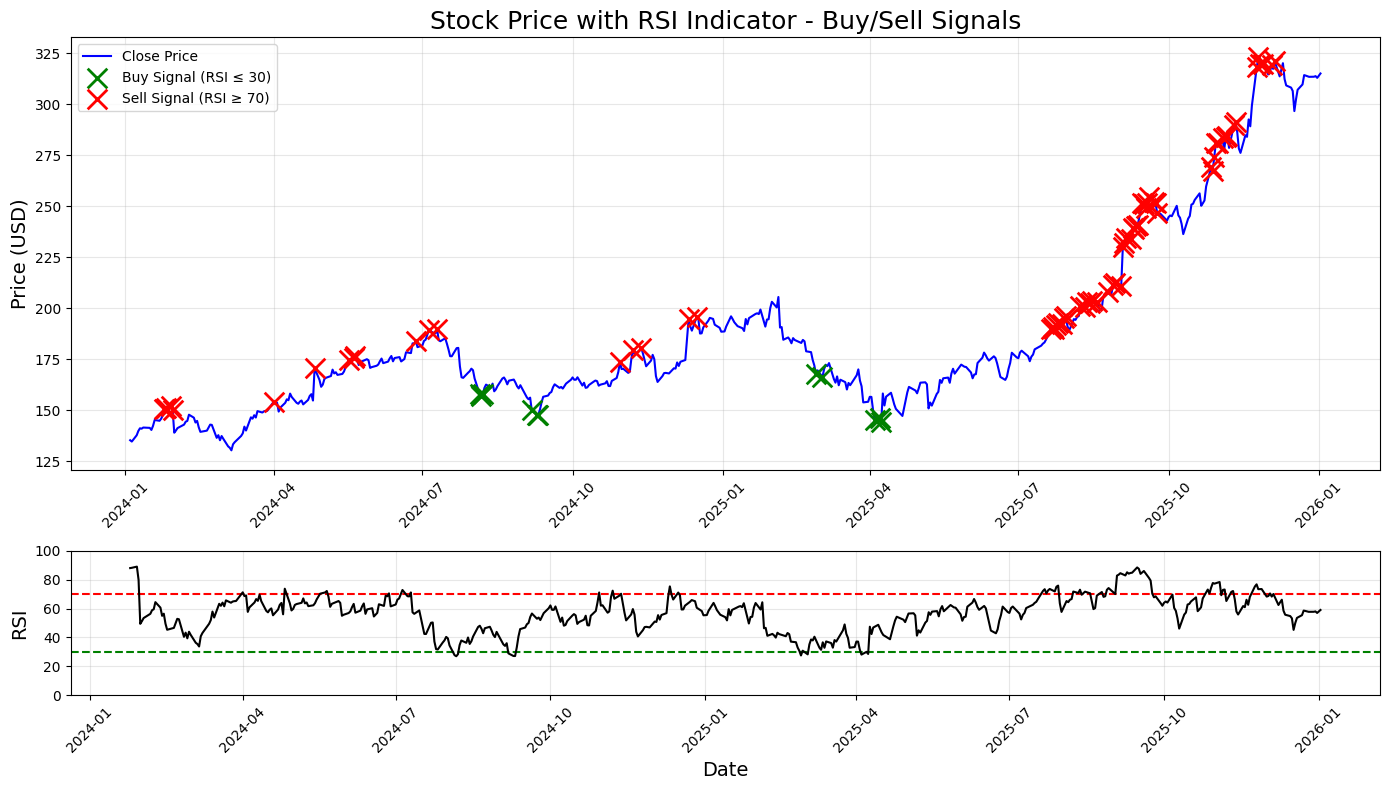

In [104]:
fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(14, 8))

# Top subplot: Close Price
ax[0].plot(data['Close'], label='Close Price', linewidth=1.5, color='blue')

# Identify buy and sell signals
buy_signals = data[data['RSI'] <= 30]
sell_signals = data[data['RSI'] >= 70]

# Add buy signals (green X)
ax[0].scatter(buy_signals.index, buy_signals['Close'], marker='x', color='green', 
              s=200, linewidths=2, label='Buy Signal (RSI ≤ 30)', zorder=5)

# Add sell signals (red X)
ax[0].scatter(sell_signals.index, sell_signals['Close'], marker='x', color='red', 
              s=200, linewidths=2, label='Sell Signal (RSI ≥ 70)', zorder=5)

ax[0].set_title('Stock Price with RSI Indicator - Buy/Sell Signals', fontsize=18)
ax[0].set_ylabel('Price (USD)', fontsize=14)
ax[0].legend(fontsize=10, loc='upper left')
ax[0].grid(True, alpha=0.3)



# Bottom subplot: RSI
ax[1].axhline(y=70, color='red', ls='dashed', linewidth=1.5, label='Overbought (70)')
ax[1].axhline(y=30, color='green', ls='dashed', linewidth=1.5, label='Oversold (30)')
ax[1].fill_between(range(len(data)), 70, 100, alpha=0.1, color='red')
ax[1].fill_between(range(len(data)), 0, 30, alpha=0.1, color='green')
ax[1].plot(data['RSI'], color='black', linewidth=1.5, label='RSI (14)')
ax[1].set_ylabel('RSI', fontsize=14)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylim([0, 100])
#ax[1].legend(fontsize=10, loc='upper left')
ax[1].grid(True, alpha=0.3)

# Rotate x-axis labels for both subplots
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()

## Linear Regression

Linear Regression fits a straight line through price data to identify the overall trend direction and magnitude. It calculates the line of best fit using the least squares method.

**Formula:**
$$y = mx + b$$

Where:
- $y$ is the predicted price
- $m$ is the slope (trend direction/strength)
- $x$ is the time period
- $b$ is the y-intercept

The line is calculated to minimize the sum of squared errors between actual prices and predicted values:
$$\text{SSE} = \sum_{i=1}^{n} (P_i - \hat{P}_i)^2$$

**Key characteristics:**
- **Trend identification**: Shows the overall direction (uptrend if positive slope, downtrend if negative)
- **Support/Resistance**: Acts as dynamic support or resistance level
- **Deviation detection**: Large deviations from the line suggest potential reversals
- **Mean reversion**: Prices tend to gravitate back toward the regression line

**When to use:**
- Identifying long-term trends more clearly than moving averages
- Finding potential entry/exit points when price deviates significantly from the line
- Confirming trend strength with slope magnitude
- Combining with other indicators for confirmation

### Entry/Exit Strategies Using Linear Regression

#### 1. Mean Reversion Strategy
- **Entry**: Buy when price is significantly **below** the regression line (typically 1-2 standard deviations below)
- **Exit**: Sell when price **returns to or crosses above** the line
- **Logic**: Prices tend to revert back toward the trend line

#### 2. Trend Following Strategy
- **Entry**: Buy when price is **above** the line AND the slope is **positive** (uptrend confirmed)
- **Exit**: Sell when price **breaks below** the line or slope becomes negative
- **Logic**: Trade in the direction of the trend

#### 3. Support/Resistance Bounces
- **Entry**: Buy when price bounces off the regression line from below (in an uptrend)
- **Exit**: Take profit at resistance or when price moves significantly above
- **Logic**: The line acts as dynamic support in uptrends and resistance in downtrends

#### 4. Deviation Magnitude Strategy
- Calculate the distance (deviation) from price to the line
- **Entry**: When deviation is extreme (price far from line - potential reversal)
- **Exit**: When deviation normalizes (price returns to line)
- **Logic**: Extreme deviations are unsustainable

#### 5. Trend Strength Confirmation
- **Steep positive slope** = Strong uptrend (good for buying)
- **Steep negative slope** = Strong downtrend (good for shorting)
- **Flat slope** = No clear trend (avoid trading or use range strategies)

In [105]:
data['LINREG100'] = ta.LINEARREG(data['Close'], timeperiod=100)

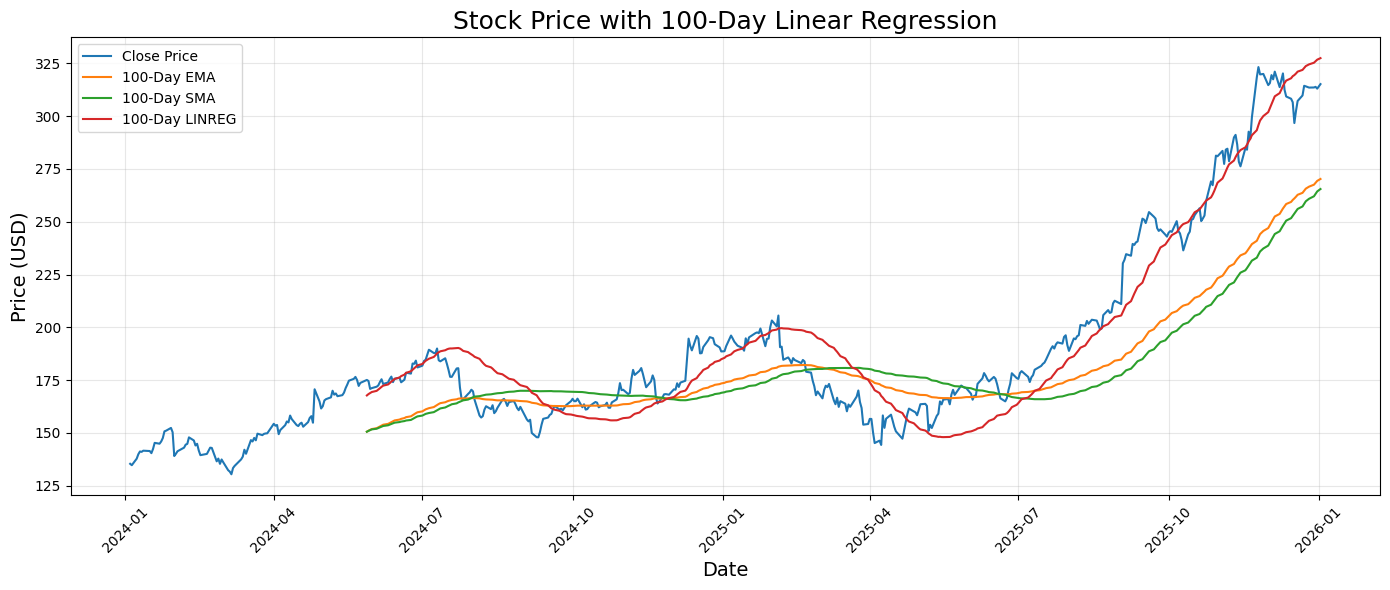

In [106]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', linewidth=1.5)
plt.plot(data['EMA100'], label='100-Day EMA', linewidth=1.5)
plt.plot(data['SMA100'], label='100-Day SMA', linewidth=1.5)
plt.plot(data['LINREG100'], label= '100-Day LINREG', linewidth=1.5)

plt.title('Stock Price with 100-Day Linear Regression', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()